In [3]:
import pandas as pd
import numpy as np
import pickle

In [4]:
data=pd.read_csv('house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df_housing=["bedrooms","bathrooms","sqft_living","floors","yr_built","sqft_above","sqft_basement","view","condition","grade", 
    "sqft_lot","waterfront","yr_renovated","zipcode"]

X=data[df_housing]
y=data['price']


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred=reg.predict(X_test)
print(y_pred)  

[ 515389.16646615  676482.86773981 1220312.40643439 ...  553663.16265625
 1372207.23802521  483812.54788857]


In [10]:
from sklearn.feature_selection import SelectKBest,f_regression
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X,y)


SelectKBest(k=5, score_func=<function f_regression at 0x0000017B4209C1F0>)

In [11]:
mask = selector.get_support()
top5 = X.columns[mask].tolist()
print("Top 5 features (global):", top5)
X_selected = X[top5]

Top 5 features (global): ['bathrooms', 'sqft_living', 'sqft_above', 'view', 'grade']


In [12]:
from sklearn.model_selection import train_test_split
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_selected,y,test_size=0.20,random_state=42)

In [13]:
print("Train shape:", X_train_new.shape, "Test shape:", X_test_new.shape)

Train shape: (17290, 5) Test shape: (4323, 5)


In [14]:
model = LinearRegression()
model.fit(X_train_new, y_train_new)

LinearRegression()

In [15]:
coef_df = pd.DataFrame({
    "Feature": top5,
    "Coefficient": model.coef_
})
print(coef_df)
print("Intercept:", model.intercept_)

       Feature    Coefficient
0    bathrooms  -26117.367954
1  sqft_living     209.692640
2   sqft_above     -42.896607
3         view   91312.230276
4        grade  101279.316983
Intercept: -561748.3265133419


In [16]:
import pandas as pd
import numpy as np

selected_features = ['bathrooms', 'sqft_living', 'sqft_above', 'view', 'grade']

new_df = pd.DataFrame([
    {'grade': 8, 'view': 1, 'bathrooms': 2.0, 'sqft_above': 1500, 'sqft_living': 1800},
    
])

X_new = new_df[selected_features]

X_new_array = X_new.to_numpy()   

predictions = model.predict(X_new_array)
y_pred_new=model.predict(X_test_new)

new_df['predicted_price'] = predictions
print(new_df)

   grade  view  bathrooms  sqft_above  sqft_living  predicted_price
0      8     1        2.0        1500         1800    600665.545328


c:\Users\Varad Deshpande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_new, y_pred_new)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 63632318736.88203


In [18]:
mae=mean_absolute_error(y_test_new,y_pred_new)
print(mae)

score=r2_score(y_test_new,y_pred_new)
print(score)

159958.25515326075
0.5790865022334417


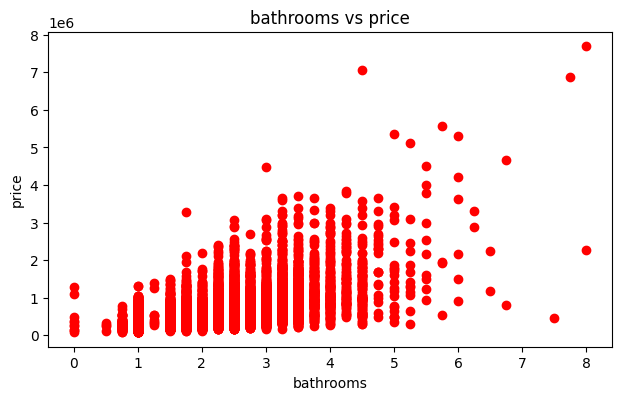

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.title('bathrooms vs price')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.scatter(X['bathrooms'], y, color = 'r')

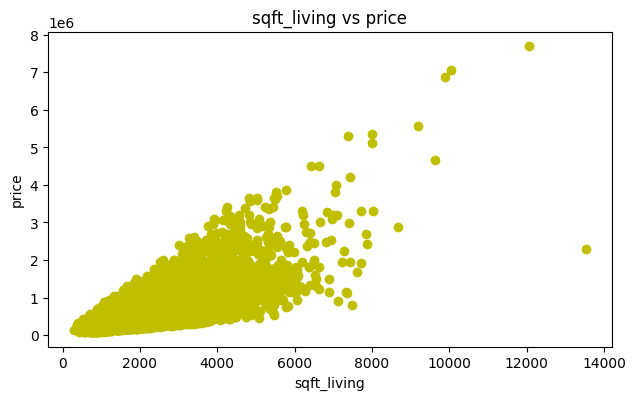

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.title('sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(X['sqft_living'], y, color = 'y')

In [22]:
import pickle

selected_features = ['bathrooms', 'sqft_living', 'sqft_above', 'view', 'grade']  # your top 5
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump((model, selected_features), file)
